## Startup code

9990

In [90]:
%config Completer.use_jedi = False
%load_ext autotime
import sys
from importlib import reload
%load_ext autoreload
%autoreload 2

import Utility.utils as util
from Utility.basic_modules import *

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 313 ms (started: 2022-10-26 10:09:04 -06:00)


Change the following directory paths as necessary

In [ ]:
# CHANGE IT: Path of code for Utility files and other libraries.
ROOT_dir = r"C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code"
# CHANGE IT: Path of the downloaded dataset
LARGE_dataset_root_dir = r"E:\Research\stackexchange\2022_june\relevent"  
POSTS_file = os.path.join(LARGE_dataset_root_dir, "Posts.xml")

In [91]:
PD = util.Pandas(ROOT_dir)
SO = util.SO(dataset_dir=LARGE_dataset_root_dir)

Initiated
time: 250 ms (started: 2022-10-26 10:09:07 -06:00)


## Dataset filtering

### Bootstrap

#### Tag stat selected question

In [ ]:
def get_tags_stat(df_questions):
    tags_stat = {}
    for index, row in df_questions.iterrows():
        tags = util.SO.get_tags(row['Tags'])
        for tag in tags:
            tags_stat[tag] = tags_stat.get(tag, 0) + 1
    return tags_stat
Tag_stat_Q_initial = get_tags_stat(DF_questions_initial_tag)
print(len(Tag_stat_Q_initial))
PD.save_obj(Tag_stat_Q_initial, "Tag_stat_Q_initial")
# Tag_stat_Q_initial = load_obj("Tag_stat_Q_initial")
print(len(Tag_stat_Q_initial))

1984
Base method
Directory C:\Users\mdabd\iCloudDrive\Research_code\Research_code\Thesis_code\AutoML_emp_code\pickle already exists and so returning.
Saved object to a file: C:\Users\mdabd\iCloudDrive\Research_code\Research_code\Thesis_code\AutoML_emp_code\pickle\Tag_stat_Q_initial.pkl
1984
time: 734 ms (started: 2022-08-26 13:45:59 -06:00)


In [ ]:
import lxml.etree  as ET
def tag_stat_all_questions(selected_tag_list):
    tags_stat = {}
    context = ET.iterparse(POSTS_file, events=("end",))
    print("Going to extract all tags stat from questions")
    # df_posts = pd.DataFrame(columns = COLS)
    total_questions = 0
    _, root = next(context)
    for event, elem in context:
        if elem.tag == "row":
            post_tags = elem.attrib.get('Tags', '')
            post_tags_list = util.SO.get_tags(post_tags) # list of tags
            for tag in post_tags_list:
                if tag in selected_tag_list:
                    tags_stat[tag] = tags_stat.get(tag, 0) + 1

            # progress
            if total_questions % 1000000 == 0:
                print('done', elem.attrib['Id'])
            elem.clear()
            root.clear()
            total_questions += 1
            # count += 1
    # print(len(all_tags_in_Q_all))
    return tags_stat
Tag_stat_Q_all = tag_stat_all_questions(Tag_stat_Q_initial)
PD.save_obj(Tag_stat_Q_all, "Tag_stat_Q_all")

In [ ]:
Significance_tag = {}
Relevance_tag = {}
for tag in Tag_stat_Q_initial:
    if tag in Tag_list_initial:
        continue
    sig = Tag_stat_Q_initial[tag] * 1.0 / Tag_stat_Q_all[tag]
    rel = Tag_stat_Q_initial[tag] * 1.0 / len(DF_questions_initial_tag)
    Significance_tag[tag] = sig
    Relevance_tag[tag] = rel
PD.save_obj(Significance_tag, "Significance_tag")
PD.save_obj(Relevance_tag, "Relevance_tag")

for tag in Tag_stat_Q_initial:
    if tag in Tag_list_initial:
        continue
    print("Tag: %s sig: %f rel: %f" % (tag, Significance_tag[tag], Relevance_tag[tag] ))

In [ ]:
def get_tag_with_higher_sig_and_rel(sig, rel, sig_map, rel_map):
    assert len(sig_map) == len(rel_map)
    results = []
    for tag in sig_map:
        if(sig_map[tag] >= sig and rel_map[tag] >= rel):
            results.append(tag)
    return results

def get_intersection_info(list_big, list_ref):
    list_ref = set(list_ref)
    count = 0
    for item in list_big:
        if item in list_ref:
            count += 1
    pct = round(count * 100.0 / len(list_big), 1)
    return count, pct

tags_with_higher_sig_rel = get_tag_with_higher_sig_and_rel(.05, .001, Significance_tag, Relevance_tag)
print(len(tags_with_higher_sig_rel))

tmp_sigs = []
tmp_rel = []
tmp_posts = []
for tag in tags_with_higher_sig_rel:
    tmp_sigs.append(Significance_tag[tag])
    tmp_rel.append(Relevance_tag[tag])
    tmp_posts.append(Tag_stat_Q_all[tag])
df_tag_recommend = pd.DataFrame()
df_tag_recommend['sig'] = tmp_sigs
df_tag_recommend['tag'] = tags_with_higher_sig_rel
df_tag_recommend['rel'] = tmp_rel
df_tag_recommend['posts'] = tmp_posts
# output_file = os.path.join("tags", "tags_recommended_stat.csv")
PD.save_df(df_tag_recommend, "df_tag_recommend.csv")
PD.save_obj(df_tag_recommend, "df_tag_recommend")
# df_tag_recommend.to_csv(output_file, index=False)
print(df_tag_recommend)

#### Manual assesment

In [ ]:
Tag_list_relevent = ["amazon-machine-learning",
"automl",
"aws-chatbot",
"aws-lex",
"azure-machine-learning-studio",
"azure-machine-learning-workbench",
"azureml",
"azureml-python-sdk",
"azuremlsdk",
"driverless-ai",
"ensemble-learning",
"gbm",
"google-cloud-automl-nl",
"google-cloud-vertex-ai",
"google-natural-language",
"h2o.ai",
"h2o4gpu",
"mlops",
"sparkling-water",
"splunk-calculation",
"splunk-dashboard",
"splunk-query",
"splunk-sdk"]

time: 219 ms (started: 2022-08-26 15:18:49 -06:00)


### Extract final posts

In [ ]:
Tag_list_final = Tag_list_relevent + Tag_list_initial
print(Tag_list_final)
print(len(Tag_list_final))
PD.save_obj(Tag_list_final, "Tag_list_final")

In [ ]:
DF_question_final_tag = SO.get_questions_from_tags(Tag_list_final)
print(len(DF_question_final_tag))
# output_file = os.path.join("output", "questions_final_tag.csv")
# DF_question_final_tag.to_csv(output_file, index=False)
PD.save_df(DF_question_final_tag, "DF_question_final_tag.csv")
PD.save_obj(DF_question_final_tag, "DF_question_final_tag")

10549
Directory C:\Users\mdabd\iCloudDrive\Research_code\Research_code\Thesis_code\AutoML_emp_code\output already exists and so returning.
Dataframe has been saved in: C:\Users\mdabd\iCloudDrive\Research_code\Research_code\Thesis_code\AutoML_emp_code\output\DF_question_final_tag.csv
Base method
Directory C:\Users\mdabd\iCloudDrive\Research_code\Research_code\Thesis_code\AutoML_emp_code\pickle already exists and so returning.
Saved object to a file: C:\Users\mdabd\iCloudDrive\Research_code\Research_code\Thesis_code\AutoML_emp_code\pickle\DF_question_final_tag.pkl
time: 38min 29s (started: 2022-08-26 15:19:09 -06:00)


In [ ]:
question_ids = DF_question_final_tag['Id'].tolist()
print(len(question_ids))
DF_answer_final_tag = SO.get_answers_from_questions(question_ids)
print(len(DF_answer_final_tag))
# output_file = os.path.join("output", "answers_final_tag.csv")
# DF_answer_final_tag.to_csv(output_file, index=False)
PD.save_df(DF_answer_final_tag, "DF_answer_final_tag.csv")
PD.save_obj(DF_answer_final_tag, "DF_answer_final_tag")


In [ ]:
print(len(DF_answer_final_tag))

11007
time: 219 ms (started: 2022-08-26 16:37:30 -06:00)


### Questions stats by tags

In [ ]:
Tag_list_final = PD.load_obj("Tag_list_final")
print(len(Tag_list_final))

41
time: 40.2 ms


In [ ]:
Map_tag_qids = {}
for tag in Tag_list_final:
    Map_tag_qids[tag] = []

for index, row in All_Questions_df.iterrows():
        tags = util.SO.get_tags(row['Tags'])
        for tag in tags:
            if(tag in Tag_list_final):
                Map_tag_qids[tag].append(int(row['Id']))
PD.save_obj(Map_tag_qids, "Map_tag_qids")

# total = 0
# for tag in Map_tag_qids:
#     total += len(Map_tag_qids[tag])
#     print(tag, len(Map_tag_qids[tag]))
tags = []
q_nums = []
for tag in sorted(Map_tag_qids, key = lambda topic: len(Map_tag_qids[topic]), reverse=True):
    tags.append(tag)
    q_nums.append(len(Map_tag_qids[tag]))
    print(tag, len(Map_tag_qids[tag]))
df = pd.DataFrame()
df['Tags'] = tags
df['#Questions'] = q_nums
PD.save_df(df, "Tags_questions_stats.csv")
# print(total)

### Generate final stats

In [ ]:
SO.generate_stats_POSTS()

done 64131280
total_posts: 56264787, total_Q: 22634238, total_A: 33630549, total_Q_with_acc: 11587787


(56264787, 22634238, 33630549, 11587787)

time: 32min 58s (started: 2022-08-26 14:28:34 -06:00)


## Topic Modeling

In [ ]:
import Utility.TM as TopicModel

time: 296 ms (started: 2022-08-26 16:45:36 -06:00)


In [ ]:
TM = TopicModel.TM(DF_question_final_tag, DF_answer_final_tag)
df_TM = TM.get_processed_TM_data()
PD.save_df(df_TM, "df_TM.csv")
PD.save_obj(df_TM, "df_TM")

In [ ]:
topic_range = []
for i in range(5, 71, 5):
    if i not in topic_range:
        topic_range.append(i)
topic_range.sort()
print(topic_range)


In [ ]:
TM.generate_topic_coherence_score(topic_range, "R1")

In [ ]:
for i in range(2, 6):
    run = "R%d" % i
    TM.generate_topic_coherence_score(topic_range, run)


In [ ]:
NUM_TOPICS = [15]
TM.generate_topics(NUM_TOPICS, "R1")

TM\R1 path exists and removing it.
Creating directory TM\R1.
10549
3792
3792
===========> 3792 accepted answer posts
3792
14341
time: 1min 33s (started: 2022-08-26 18:26:58 -06:00)


In [ ]:
TM.generate_topics(NUM_TOPICS, "R2")

Creating directory TM\R2.
10549
3792
3792
===========> 3792 accepted answer posts
3792
14341
time: 1min 35s (started: 2022-08-26 18:29:00 -06:00)


In [ ]:
file1 = r"C:\Users\mdabd\iCloudDrive\Research_code\Research_code\Thesis_code\AutoML_emp_code\TM\R1\15_Topics\postToTopic.csv" # Change it as necessary
file2 = r"C:\Users\mdabd\iCloudDrive\Research_code\Research_code\Thesis_code\AutoML_emp_code\TM\R2\15_Topics\postToTopic.csv" # Change it as necessary

time: 250 ms (started: 2022-08-26 18:33:42 -06:00)


In [ ]:
TM.add_metadata_info(file1)

Dataframe has been saved in: TM_posts_updated.csv
time: 13.3 s (started: 2022-08-26 19:26:51 -06:00)


In [ ]:
TM.add_metadata_info(file2)

Dataframe has been saved in: TM_posts_updated.csv
time: 14.5 s (started: 2022-08-26 19:27:50 -06:00)


## Evolution over time

              All
CreationDate     
2008-10-01      1
2009-02-01      0
2009-06-01      1
2009-10-01      2
2010-02-01      0


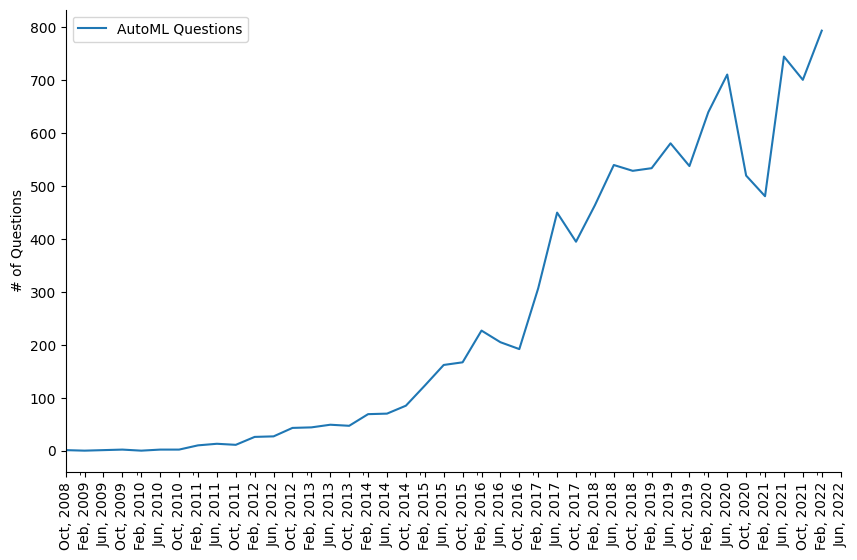

time: 430 ms


In [ ]:
SAMPLING = '4MS'
DUMMY_DATE = pd.to_datetime('2008-8-1 18:18:37.777')
Map_cat_ques_df = {}
df_all_evolution = All_Questions_df[['Id', 'CreationDate']]
df_all_evolution.CreationDate = df_all_evolution.CreationDate.apply(pd.to_datetime)
df_all_evolution = df_all_evolution.resample(SAMPLING, on="CreationDate").count()[["Id"]]
df_all_evolution.columns = ['All']
print(df_all_evolution.head())


file_name = os.path.join(ROOT_dir, "Output", "All_posts_evolution.png")
df = df_all_evolution[['All']]
df = df[:-1]
# df = df[:-1] # Dropping the last element
df.columns = ['AutoML Questions']
ax = df.plot(figsize=(10,6))
ax.xaxis.label.set_visible(False)
# plt.xlabel('Time')
plt.ylabel('# of Questions')

labels = [x.strftime("%b, %Y") for x in df_all_evolution.index]
ax.set_xticks(labels)
ax.set_xticklabels(labels, rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.title.set_visible(False)
# plt.axis('off')
# plt.grid()
# plt.savefig(file_name, dpi=1000, bbox_inches = "tight")
plt.show()

In [ ]:
print(len(df_all_evolution))

42
time: 41 ms


### Evolution of Topic category

MLOps ==========> 4557
Model ==========> 2907
Data ==========> 2851
Documentation ==========> 234


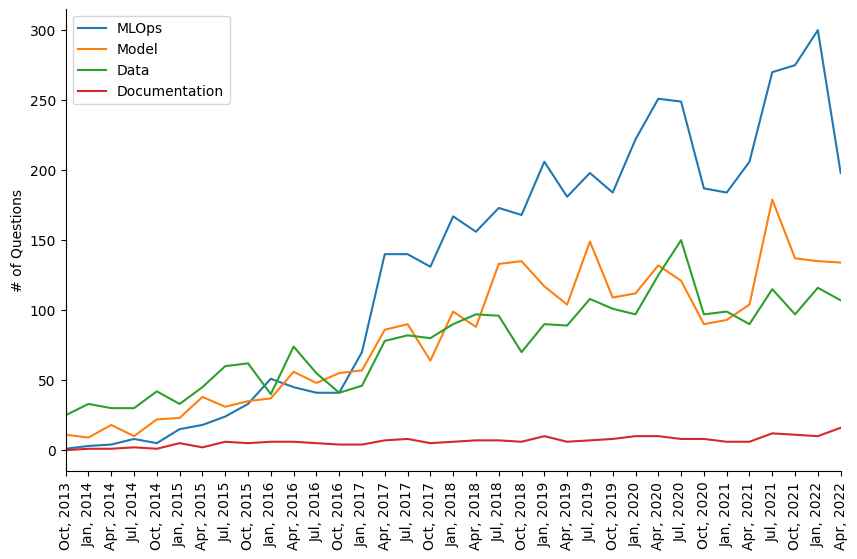

time: 3.75 s


In [ ]:
def generate_topic_category_evolution_graph(df_all_questions, map_cat_qids):


    SAMPLING = '3MS'
    DUMMY_DATE = pd.to_datetime('2008-10-1 18:18:37.777')
    # Map_cat_ques_df = {}
    df_all_absolute = df_all_questions[['Id', 'CreationDate']]
    df_all_absolute.CreationDate = df_all_absolute.CreationDate.apply(pd.to_datetime)
    df_all_absolute = df_all_absolute.resample(SAMPLING, on="CreationDate").count()[["Id"]]
    df_all_absolute.columns = ['All']
    # print(df_all_absolute)

    # print(df_all.head())
    for high_cat in map_cat_qids:
        # print("%s Categories has %d questions" % (high_cat, len(Map_cat_ques[high_cat])))
        qids = map_cat_qids[high_cat]
        df_cat = df_all_questions[df_all_questions['Id'].astype(int).isin(qids)]
        print("%s ==========> %d" % (high_cat, len(df_cat)))
        # df_cat = Map_cat_ques_df['Customization']
        df_cat.CreationDate = df_cat.CreationDate.apply(pd.to_datetime)
        df_cat = df_cat.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
        df_cat = df_cat.resample(SAMPLING, on='CreationDate').count()[["Id"]]
        df_cat.columns = [high_cat]
        df_all_absolute = df_all_absolute.merge(df_cat, how='left', on='CreationDate', validate='one_to_one')
        # print(df_cat)
        # Map_cat_ques_df[high_cat] = df_cat

    df_topic_evolution = df_all_absolute.copy(deep=True)
    df_topic_evolution = df_topic_evolution[20:]
    file_name = os.path.join(ROOT_dir, "Output", "Topic_category_evolution.png")

    ax = df_topic_evolution.drop(columns='All').plot(figsize=(10,6))
    ax.xaxis.label.set_visible(False)
    # plt.xlabel('Time')
    plt.ylabel('# of Questions')

    labels = [x.strftime("%b, %Y") for x in df_topic_evolution.index]
    ax.set_xticks(labels)
    ax.set_xticklabels(labels, rotation=90)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.grid()
    plt.savefig(file_name, dpi=1000, bbox_inches = "tight")
    plt.show()

generate_topic_category_evolution_graph(DF_question_final_tag, Map_Cat_quids)

### Evolution of Topic

Pipeline Automation ==========> 902
Library/Platform Management ==========> 1494
Resource Management ==========> 408
Model Debugging ==========> 520
Data Management ==========> 1776
Model Performance ==========> 1320
Library Documentation ==========> 234
Model Load & Deployment ==========> 969
Model Training & Monitoring ==========> 621
Data Exploration ==========> 412
Data Transformation ==========> 663
Bot Development ==========> 784
Model Design ==========> 446


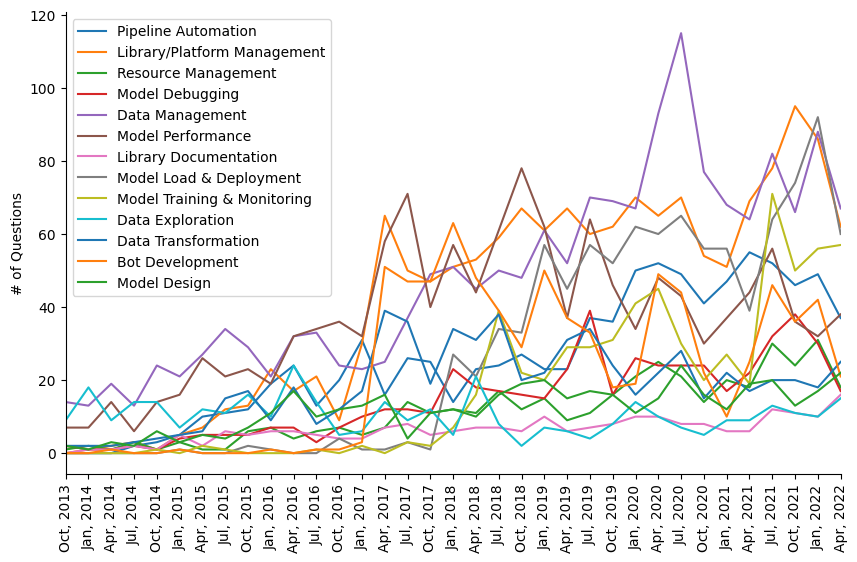

time: 4.28 s


In [ ]:
def generate_topic_evolution_graph(df_all_questions, map_topic_qids):


    SAMPLING = '3MS'
    DUMMY_DATE = pd.to_datetime('2008-10-1 18:18:37.777')
    # Map_cat_ques_df = {}
    df_all_absolute = df_all_questions[['Id', 'CreationDate']]
    df_all_absolute.CreationDate = df_all_absolute.CreationDate.apply(pd.to_datetime)
    df_all_absolute = df_all_absolute.resample(SAMPLING, on="CreationDate").count()[["Id"]]
    df_all_absolute.columns = ['All']
    # print(df_all_absolute)

    # print(df_all.head())
    for high_cat in map_topic_qids:
        # print("%s Categories has %d questions" % (high_cat, len(Map_cat_ques[high_cat])))
        qids = map_topic_qids[high_cat]
        df_cat = df_all_questions[df_all_questions['Id'].astype(int).isin(qids)]
        print("%s ==========> %d" % (high_cat, len(df_cat)))
        # df_cat = Map_cat_ques_df['Customization']
        df_cat.CreationDate = df_cat.CreationDate.apply(pd.to_datetime)
        df_cat = df_cat.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
        df_cat = df_cat.resample(SAMPLING, on='CreationDate').count()[["Id"]]
        df_cat.columns = [high_cat]
        df_all_absolute = df_all_absolute.merge(df_cat, how='left', on='CreationDate', validate='one_to_one')
        # print(df_cat)
        # Map_cat_ques_df[high_cat] = df_cat


    df_topic_evolution = df_all_absolute.copy(deep=True)
    df_topic_evolution = df_topic_evolution[20:]
    file_name = os.path.join(ROOT_dir, "Output", "Topic_evolution.png")

    ax = df_topic_evolution.drop(columns='All').plot(figsize=(10,6))
    ax.xaxis.label.set_visible(False)
    # plt.xlabel('Time')
    plt.ylabel('# of Questions')

    labels = [x.strftime("%b, %Y") for x in df_topic_evolution.index]
    ax.set_xticks(labels)
    ax.set_xticklabels(labels, rotation=90)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.grid()
    plt.savefig(file_name, dpi=1000, bbox_inches = "tight")
    plt.show()

generate_topic_evolution_graph(DF_question_final_tag, Map_TM_quids)

Pipeline Automation ==========> 902
Library/Platform Management ==========> 1494
Resource Management ==========> 408
Model Load & Deployment ==========> 969
Bot Development ==========> 784


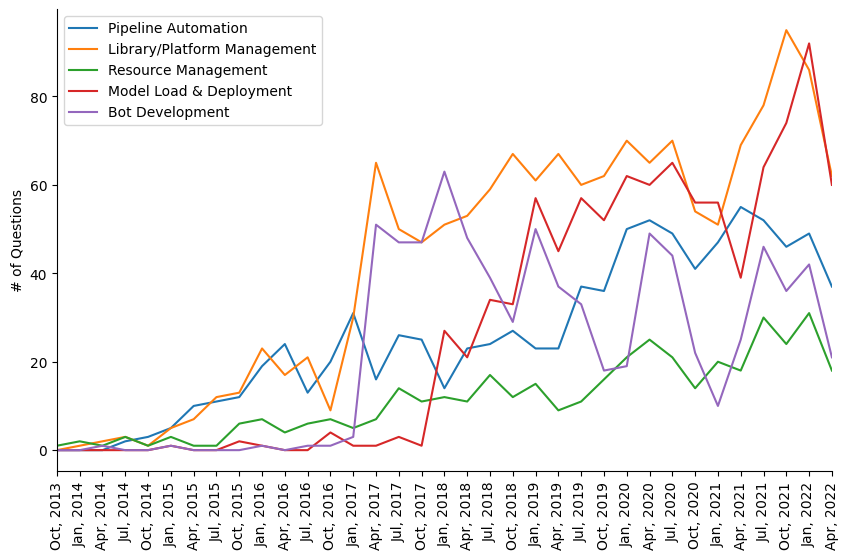

Model Debugging ==========> 520
Model Performance ==========> 1320
Model Training & Monitoring ==========> 621
Model Design ==========> 446


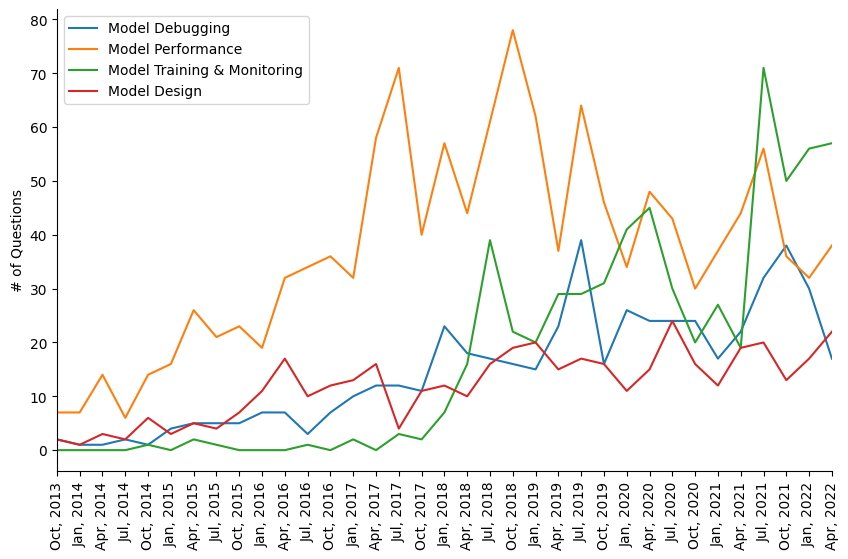

Data Management ==========> 1776
Data Exploration ==========> 412
Data Transformation ==========> 663


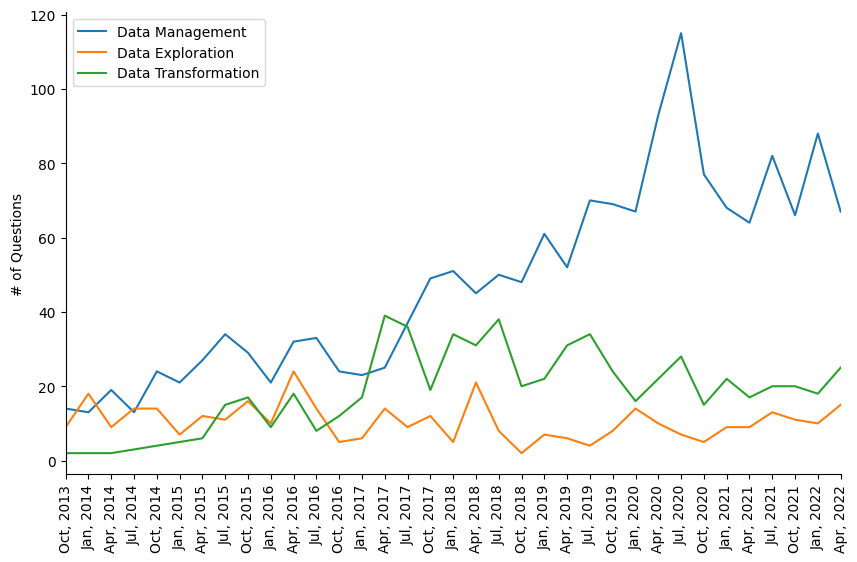

Library Documentation ==========> 234


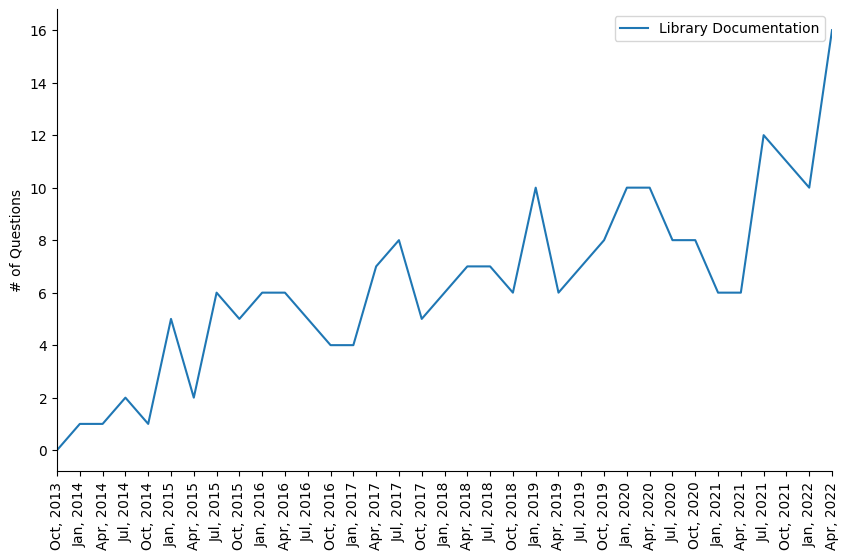

time: 1.11 s


In [ ]:
def generate_detail_cat_topic_evolution_graph(df_all_questions, map_cat_topic, map_topic_qids):


    SAMPLING = '3MS'
    DUMMY_DATE = pd.to_datetime('2008-10-1 18:18:37.777')
    # Map_cat_ques_df = {}
    df_all_absolute = df_all_questions[['Id', 'CreationDate']]
    df_all_absolute.CreationDate = df_all_absolute.CreationDate.apply(pd.to_datetime)
    df_all_absolute = df_all_absolute.resample(SAMPLING, on="CreationDate").count()[["Id"]]
    df_all_absolute.columns = ['All']

    df_copy = df_all_absolute.copy(deep=True)
    # print(df_all_absolute)

    # print(df_all.head())
    for high_cat in map_cat_topic:
        df_all_absolute = df_copy.copy(deep=True)
        # print("%s Categories has %d questions" % (high_cat, len(Map_cat_ques[high_cat])))
        for topic in map_cat_topic[high_cat]:
            qids = map_topic_qids[topic]
            df_cat = df_all_questions[df_all_questions['Id'].astype(int).isin(qids)]
            print("%s ==========> %d" % (topic, len(df_cat)))
            # df_cat = Map_cat_ques_df['Customization']
            df_cat.CreationDate = df_cat.CreationDate.apply(pd.to_datetime)
            df_cat = df_cat.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
            df_cat = df_cat.resample(SAMPLING, on='CreationDate').count()[["Id"]]
            df_cat.columns = [topic]
            df_all_absolute = df_all_absolute.merge(df_cat, how='left', on='CreationDate', validate='one_to_one')



        df_topic_evolution = df_all_absolute.copy(deep=True)
        df_topic_evolution = df_topic_evolution[20:]


        ax = df_topic_evolution.drop(columns='All').plot(figsize=(10,6))
        ax.xaxis.label.set_visible(False)
        # plt.xlabel('Time')
        plt.ylabel('# of Questions')

        labels = [x.strftime("%b, %Y") for x in df_topic_evolution.index]
        ax.set_xticks(labels)
        ax.set_xticklabels(labels, rotation=90)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # plt.grid()
        # plt.savefig(file_name, dpi=1000, bbox_inches = "tight")
        plt.show()

generate_detail_cat_topic_evolution_graph(DF_question_final_tag, MAP_Cat_Topic, Map_TM_quids)

### Platform Analysis

In [ ]:
def plot_time_series_dataframe(df, file_name, xlablel="Time"):
    ax = df.drop(columns='All').plot(figsize=(10,6))
    ax.xaxis.label.set_visible(False)
    plt.xlabel(xlablel)
    plt.ylabel('# of Questions')
    labels = [x.strftime("%b, %Y") for x in df.index]
    ax.set_xticks(labels)
    ax.set_xticklabels(labels, rotation=90)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(file_name, dpi=1000, bbox_inches = "tight")
    plt.show()

def get_initial_df():
    df = All_Questions_df[['Id', 'CreationDate']]
    df.CreationDate = df.CreationDate.apply(pd.to_datetime)
    df = df.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
    df = df.resample(SAMPLING, on="CreationDate").count()[["Id"]]
    df.columns = ['All']
    return df

time: 36.5 ms


In [ ]:
PLATFORMS = {
'Amazon SageMaker':	['amazon-sagemaker'],
"Splunk":	["splunk-query", 'splunk', 'splunk-calculation', 'splunk-dashboard', "splunk-sdk"],
"H2O AI":	["h2o", "h2o.ai", "h2o4gpu"],
"Azure Machine Learning": ["azure-machine-learning-service", "azure-machine-learning-studio", 
                           "azureml", "azureml-python-sdk", "azure-machine-learning-workbench", "azuremlsdk"],
"Amazon Lex": ["aws-lex", "amazon-lex", 'amazon-machine-learning', "aws-chatbot"],
'Google Cloud AutoML': ["google-cloud-automl", 'google-cloud-vertex-ai', 'google-natural-language', "google-cloud-automl-nl"],
'Rapid Miner':	['rapidminer'],
'PyCaret': ['pycaret'],
'AutoKera': ['auto-keras'],
'Tpod': ['tpot']
}
print(len(PLATFORMS))

10
time: 42 ms


In [ ]:
Map_Platfoms_quids = {}
for platform in PLATFORMS:
    Map_Platfoms_quids[platform] = set()
    for tag in PLATFORMS[platform]:
        Map_Platfoms_quids[platform].update(Map_tag_qids[tag])

for platform in sorted(Map_Platfoms_quids, key = lambda platform: len(Map_Platfoms_quids[platform]), reverse=True):
    print(platform, len(Map_Platfoms_quids[platform]))

PD.save_obj(Map_Platfoms_quids, "Map_Platfoms_quids")

Amazon SageMaker 2053
Splunk 1947
H2O AI 1818
Azure Machine Learning 1512
Amazon Lex 836
Google Cloud AutoML 683
Rapid Miner 512
PyCaret 142
AutoKera 59
Tpod 40
Base method
Directory /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/pickle already exists and so returning.
Saved object to a file: /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/pickle/Map_Platfoms_quids.pkl
time: 47 ms


Amazon SageMaker 2053
Splunk 1947
H2O AI 1818
Azure Machine Learning 1512
Amazon Lex 836
Google Cloud AutoML 683
Rapid Miner 512


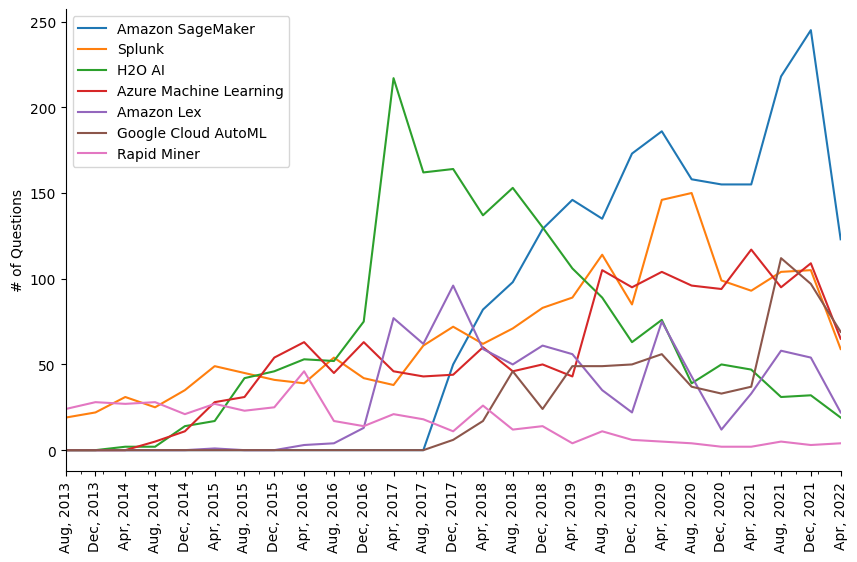

time: 3.67 s


In [ ]:
SAMPLING = '4MS'
file_name = os.path.join(ROOT_dir, "Output", "platform_evolution.csv")
fig_file_name = os.path.join(ROOT_dir, "Output", "platform_evolution.png")

df = get_initial_df()
count = 0

for platform in sorted(Map_Platfoms_quids, key = lambda topic: len(Map_Platfoms_quids[topic]), reverse=True):
    qids = Map_Platfoms_quids[platform]
    print(platform, len(qids))
    df_tmp = All_Questions_df[All_Questions_df['Id'].astype(int).isin(qids)]    
    df_tmp.CreationDate = df_tmp.CreationDate.apply(pd.to_datetime)
    df_tmp = df_tmp.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
    df_tmp = df_tmp.resample(SAMPLING, on='CreationDate').count()[["Id"]]
    df_tmp.columns = [platform]
    df = df.merge(df_tmp, how='left', on='CreationDate', validate='one_to_one')
df = df[15:]
plot_time_series_dataframe(df, fig_file_name)
    # break

### Platforms stat on unaccpeted answers

In [ ]:
sorted_Map_Platfoms_quids = sorted(Map_Platfoms_quids, key = lambda topic: len(Map_Platfoms_quids[topic]), reverse=True)

platforms = []
num_q = []
num_acc = []
acc_pcs = []

for i in range(len(sorted_Map_Platfoms_quids)):
    platform = sorted_Map_Platfoms_quids[i]
    # print(platform, len(Map_Platfoms_quids[platform]))
    qids = Map_Platfoms_quids[platform]
    print(platform, len(qids))
    df_tmp = All_Questions_df[All_Questions_df['Id'].astype(int).isin(qids)]
    acc_count = len(df_tmp[df_tmp.AcceptedAnswerId.str.len() > 2])
    acc_pc = acc_count * 100.0 / len(df_tmp)
    print(platform, acc_pc)
    platforms.append(platform)
    num_q.append(len(qids))
    num_acc.append(acc_count)
    acc_pcs.append(acc_pc)

df = pd.DataFrame()
df['Platform'] = platforms
df['#Questions'] = num_q
df['#AcceptedAnswers'] = num_acc
df['AcceptedAnswerPCT'] = acc_pcs

PD.save_df(df, "Platform_stat_acc.csv")

Amazon SageMaker 2053
Amazon SageMaker 33.02484169508037
Splunk 1947
Splunk 36.877247046738574
H2O AI 1818
H2O AI 42.7942794279428
Azure Machine Learning 1512
Azure Machine Learning 38.22751322751323
Amazon Lex 836
Amazon Lex 31.339712918660286
Google Cloud AutoML 683
Google Cloud AutoML 32.064421669106885
Rapid Miner 512
Rapid Miner 40.4296875
PyCaret 142
PyCaret 21.12676056338028
AutoKera 59
AutoKera 20.338983050847457
Tpod 40
Tpod 32.5
Directory /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/output already exists and so returning.
Dataframe has been saved in: /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/output/Platform_stat_acc.csv
time: 54.5 ms


### Evolution of tags

amazon-sagemaker 2053
splunk 1902
h2o 1798
azure-machine-learning-studio 849
amazon-lex 682
azure-machine-learning-service 575
splunk-query 555
rapidminer 512
ensemble-learning 409
google-cloud-automl 376


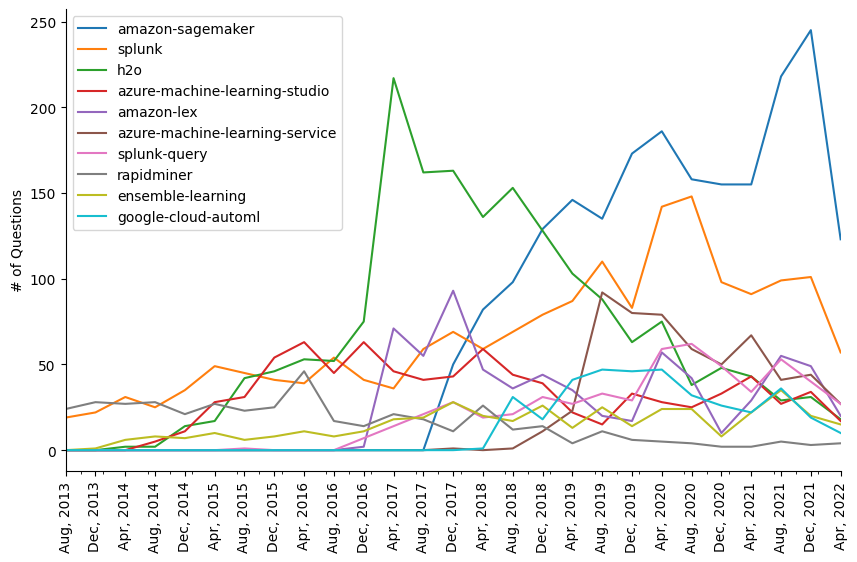

time: 3.78 s


In [ ]:
SAMPLING = '4MS'
file_name = os.path.join(ROOT_dir, "Output", "tags_evolution.csv")
fig_file_name = os.path.join(ROOT_dir, "Output", "tags_evolution.png")

df = get_initial_df()
count = 0

sorted_Map_tag_qids = sorted(Map_tag_qids, key = lambda topic: len(Map_tag_qids[topic]), reverse=True)
for i in range(10):
    tag = sorted_Map_tag_qids[i]
    qids = Map_tag_qids[tag]
    print(tag, len(qids))
    df_tmp = All_Questions_df[All_Questions_df['Id'].astype(int).isin(qids)]    
    df_tmp.CreationDate = df_tmp.CreationDate.apply(pd.to_datetime)
    df_tmp = df_tmp.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
    df_tmp = df_tmp.resample(SAMPLING, on='CreationDate').count()[["Id"]]
    df_tmp.columns = [tag]
    df = df.merge(df_tmp, how='left', on='CreationDate', validate='one_to_one')
df = df[15:]
# print(df)
plot_time_series_dataframe(df, fig_file_name)


# print(sorted_Map_tag_qids)

## RQs

### Bootstap

In [ ]:
def get_keys_sorted_map(cur_map):
    return sorted(cur_map, key = lambda key: len(cur_map[key]), reverse=True)

time: 38.9 ms


In [ ]:
Map_TMID_quids = PD.load_obj("Map_TMID_quids")
Map_TM_quids = PD.load_obj("Map_TM_quids")
Map_Cat_quids = PD.load_obj("Map_Cat_quids")

In [139]:
MAP_TMID_Name = {
    0: "Pipeline Automation",
    1: "Library/Platform Management",
    3: "Library/Platform Management",
    2: "Resource Management",
    4: "Model Debugging",
    5: "Data Management",
    13: "Data Management",
    6: "Model Performance",
    7: "Library Documentation",
    8: "Model Load & Deployment",
    9: "Model Training & Monitoring",
    10: "Data Exploration",
    11: "Data Transformation",
    12: "Bot Development",
    14: "Model Design"
}

MAP_TM_TMID = {}
for topic_id in MAP_TMID_Name:
    topic = MAP_TMID_Name[topic_id]
    if topic not in MAP_TM_TMID:
        MAP_TM_TMID[topic] = []
    MAP_TM_TMID[topic].append(topic_id)
print("\n".join("{}\t{}".format(k, v) for k, v in MAP_TM_TMID.items()))


Map_CAT_TM_ID = {    
    'MLOps': [0, 1, 2, 3, 8, 12],
    'Model': [4, 6, 9, 14],
    'Data': [5, 10, 11, 13],
    "Documentation": [7],    
    }

Map_TM_Cat = {}
for cat in Map_CAT_TM_ID:
    for topic_id in Map_CAT_TM_ID[cat]:
        topic = MAP_TMID_Name[topic_id]
        Map_TM_Cat[topic] = cat
        
MAP_Cat_Topic = {}
for topic in Map_TM_Cat:
    cat = Map_TM_Cat[topic]
    if cat not in MAP_Cat_Topic:
        MAP_Cat_Topic[cat] = []
    MAP_Cat_Topic[cat].append(topic)

Total_q = 10549
Total_acc = 3792
Total_posts = Total_q + Total_acc

Pipeline Automation	[0]
Library/Platform Management	[1, 3]
Resource Management	[2]
Model Debugging	[4]
Data Management	[5, 13]
Model Performance	[6]
Library Documentation	[7]
Model Load & Deployment	[8]
Model Training & Monitoring	[9]
Data Exploration	[10]
Data Transformation	[11]
Bot Development	[12]
Model Design	[14]
time: 250 ms (started: 2022-10-26 14:28:37 -06:00)


In [ ]:


print(MAP_Cat_Topic)


{'MLOps': ['Pipeline Automation', 'Library/Platform Management', 'Resource Management', 'Model Load & Deployment', 'Bot Development'], 'Model': ['Model Debugging', 'Model Performance', 'Model Training & Monitoring', 'Model Design'], 'Data': ['Data Management', 'Data Exploration', 'Data Transformation'], 'Documentation': ['Library Documentation']}
time: 58.6 ms


### Topic Modeling result

#### Map TM_ids to qids

In [ ]:
file = r"/Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/TM/R1/15_Topics/TM_posts_updated.csv"
df = pd.read_csv(file)
print(len(df))
Map_TMID_quids = {}
for topic_id in range(15):
    df_topic = df[df['Dominant Topic'] == topic_id]
    print(topic_id, len(df_topic))
    links = df_topic['link'].tolist()
    quids = [ util.SO.linkToId(link) for link in links]
    print(type(quids), len(quids))
    Map_TMID_quids[topic_id] = quids
    # break
PD.save_obj(Map_TMID_quids, "Map_TMID_quids")

#### Map TM_ids to answerID

#### Map TM to qids

In [ ]:
total = 0
Map_TM_quids = {}
for topic in MAP_TM_TMID:
    qids = list()
    for topic_id in MAP_TM_TMID[topic]:
        qids = qids + Map_TM_ID_quids[topic_id]
        # print(topic_id, len(qids))
    total += len(qids)        
    Map_TM_quids[topic] = qids
print(total)
PD.save_obj(Map_TM_quids, "Map_TM_quids")

total = 0
for topic in Map_TM_quids:
    total += len(Map_TM_quids[topic])
print(total)

10549
Base method
Directory /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/pickle already exists and so returning.
Saved object to a file: /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/pickle/Map_TM_quids.pkl
10549
time: 37.2 ms


#### Map cat to qids

In [ ]:
Map_Cat_quids = {}
total = 0
for cat in Map_CAT_TM_ID:
    qids = list()
    for topic_id in Map_CAT_TM_ID[cat]:
        qids = qids + Map_TM_ID_quids[topic_id]
    total += len(qids)
    Map_Cat_quids[cat] = qids
print(total)
PD.save_obj(Map_Cat_quids, "Map_Cat_quids")

10549
Base method
Directory /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/pickle already exists and so returning.
Saved object to a file: /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/pickle/Map_Cat_quids.pkl
time: 39.1 ms


#### Topic category stats by questions

In [ ]:
for cat in Map_Cat_quids:
    pcc = len(Map_Cat_quids[cat]) * 100.0 / Total_q
    print(cat, len(Map_Cat_quids[cat]), "%d topics" % len(MAP_Cat_Topic[cat]), "%0.2f%%" % pcc)

MLOps 4557 5 topics 43.20%
Model 2907 4 topics 27.56%
Data 2851 3 topics 27.03%
Documentation 234 1 topics 2.22%
time: 36.1 ms


In [ ]:
for cat in MAP_Cat_Topic:
    print("============== ", cat)
    print(MAP_Cat_Topic[cat])

==============  MLOps
['Pipeline Automation', 'Library/Platform Management', 'Resource Management', 'Model Load & Deployment', 'Bot Development']
==============  Model
['Model Debugging', 'Model Performance', 'Model Training & Monitoring', 'Model Design']
==============  Data
['Data Management', 'Data Exploration', 'Data Transformation']
==============  Documentation
['Library Documentation']
time: 44 ms


#### Topic stats by questions

In [ ]:
def get_keys_sorted_map(cur_map):
    return sorted(cur_map, key = lambda key: len(cur_map[key]), reverse=True)

print(get_keys_sorted_map(Map_TM_quids))

['Data Management', 'Library/Platform Management', 'Model Performance', 'Model Load & Deployment', 'Pipeline Automation', 'Bot Development', 'Data Transformation', 'Model Training & Monitoring', 'Model Debugging', 'Model Design', 'Data Exploration', 'Resource Management', 'Library Documentation']
time: 40.9 ms


In [ ]:
keys_sorted_map = get_keys_sorted_map(Map_TM_quids)

for topic in keys_sorted_map:
    pcc = len(Map_TM_quids[topic]) * 100.0 / Total_q
    print(topic, len(Map_TM_quids[topic]), "%0.2f%%" % pcc)

Data Management 1776 16.84%
Library/Platform Management 1494 14.16%
Model Performance 1320 12.51%
Model Load & Deployment 969 9.19%
Pipeline Automation 902 8.55%
Bot Development 784 7.43%
Data Transformation 663 6.28%
Model Training & Monitoring 621 5.89%
Model Debugging 520 4.93%
Model Design 446 4.23%
Data Exploration 412 3.91%
Resource Management 408 3.87%
Library Documentation 234 2.22%
time: 41.3 ms


#### Topic stats by questions + Accs

In [ ]:
file = r"/Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/TM/R1/15_Topics/postToTopic.csv"
df = pd.read_csv(file)
print(len(df))

topics = []
num_ques = []
num_acc = []
totals = []
pcc_ques = []
pcc_acc = []
pcc_totals = []

for topic in MAP_TM_TMID:

    total = 0
    ques = 0
    acc = 0
    for topic_id in MAP_TM_TMID[topic]:
        df_topic = df[df['Dominant Topic'] == topic_id]
        total += len(df_topic)
        ques += len(df_topic[df_topic['qa'] == 'q'])
        acc += len(df_topic[df_topic['qa'] == 'a'])
        assert total == ques + acc

    pcc_t = round((total * 100.0 / Total_posts), 1)
    pcc_q = round((ques * 100.0 / Total_q), 1)
    pcc_a = round((acc * 100.0 / Total_acc), 1)


    topics.append(topic)
    num_ques.append(ques)
    num_acc.append(acc)
    totals.append(total)
    pcc_ques.append(pcc_q)
    pcc_acc.append(pcc_a)
    pcc_totals.append(pcc_t)
    print(topic, total, num_ques, num_acc)
    # break


df = pd.DataFrame()
df['Topic'] = topics
df['#Questions'] = num_ques
df['#Acc Answers'] = num_acc
df['#Total'] = totals
df['pcc_ques'] = pcc_ques 
df['pcc_acc'] = pcc_acc 
df['pcc_total'] = pcc_totals

PD.save_df(df, "Topic_stat.csv")
PD.save_obj(df, "topic_stat")

# file_name = os.path.join(ROOT_dir, "output", "topic_stats.csv")
# save_df(df_topic_stat, file_name)
# save_obj(df_topic_stat, "df_topic_stat")
# print(len(df_topic_stat))

14341
Pipeline Automation 1132 [902] [230]
Library/Platform Management 2080 [902, 1494] [230, 586]
Resource Management 605 [902, 1494, 408] [230, 586, 197]
Model Debugging 619 [902, 1494, 408, 520] [230, 586, 197, 99]
Data Management 2355 [902, 1494, 408, 520, 1776] [230, 586, 197, 99, 579]
Model Performance 1730 [902, 1494, 408, 520, 1776, 1320] [230, 586, 197, 99, 579, 410]
Library Documentation 767 [902, 1494, 408, 520, 1776, 1320, 234] [230, 586, 197, 99, 579, 410, 533]
Model Load & Deployment 1182 [902, 1494, 408, 520, 1776, 1320, 234, 969] [230, 586, 197, 99, 579, 410, 533, 213]
Model Training & Monitoring 728 [902, 1494, 408, 520, 1776, 1320, 234, 969, 621] [230, 586, 197, 99, 579, 410, 533, 213, 107]
Data Exploration 637 [902, 1494, 408, 520, 1776, 1320, 234, 969, 621, 412] [230, 586, 197, 99, 579, 410, 533, 213, 107, 225]
Data Transformation 945 [902, 1494, 408, 520, 1776, 1320, 234, 969, 621, 412, 663] [230, 586, 197, 99, 579, 410, 533, 213, 107, 225, 282]
Bot Development 987

### MLLC

#### Extracting samples from category

In [ ]:
sample = random.sample([1,2, 4, 5], 2)
print(sample)

[4, 1]
time: 42.1 ms


In [ ]:
import random

sample_size = [94, 93, 93, 68]
def extract_sample_per_cat(cat_qids, df_all_ques):
    Map_cat_sample_qids = {}
    ind = 0
    all_question_ids = set()

    for cat in cat_qids:
        question_ids = cat_qids[cat]
        print(cat, " sample size: %d" % len(question_ids))
        sample = random.sample(question_ids, sample_size[ind])
        assert len(sample) == len(set(sample))
        assert len(sample) == sample_size[ind]
        Map_cat_sample_qids[cat] = sample
        all_question_ids.update(sample)
        ind += 1
    print(len(all_question_ids))
    print(all_question_ids)
    df_cat_sample_questions = df_all_ques[df_all_ques['Id'].astype(int).isin(all_question_ids)]
    print(len(df_cat_sample_questions))    
    PD.save_obj(Map_cat_sample_qids, "Map_cat_sample_qids")
    PD.save_obj(df_cat_sample_questions, "df_cat_sample_questions")
    PD.save_df(df_cat_sample_questions, "df_cat_sample_questions.csv")

# extract_sample_per_cat(Map_Cat_quids, DF_question_final_tag)

MLOps  sample size: 4557
Model  sample size: 2907
Data  sample size: 2851
Documentation  sample size: 234
348
{61378560, 71471108, 60667920, 54216721, 50872338, 57466903, 57405468, 59953183, 29628456, 38101052, 64165952, 66670673, 70277201, 69281898, 69099627, 60383339, 35870839, 35735675, 55619716, 50987140, 58054797, 57151638, 51423387, 24580260, 31172775, 71153838, 34699443, 68241601, 71346372, 68978891, 60539094, 25270492, 30150878, 69693666, 71538921, 62087406, 59201775, 66271474, 70494454, 66865411, 72331538, 48175380, 59492635, 68761886, 47085863, 47847736, 60696897, 60303714, 72184163, 30695794, 70613366, 67021176, 52572541, 58161534, 58753413, 57065880, 60883353, 70971811, 56523173, 14819750, 50928040, 54673837, 71152047, 39137714, 57526707, 13240766, 64147902, 68929990, 50799048, 46025161, 52589005, 37812686, 42652111, 68370906, 57137630, 60633586, 55878133, 29485562, 71959035, 15342081, 69323275, 72231453, 70756900, 63578664, 54975034, 62222912, 48833097, 70093391, 68141648,

#### **RQ** Annotation

In [111]:
file = r"C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\label\RQ_annotations.csv"
df_annotated = pd.read_csv(file)
print(len(df_annotated))

all_sample_qids = df_annotated['Id'].tolist()
print(len(all_sample_qids))

PD.save_obj(df_annotated, "df_annotated")

348
348
Base method
Directory C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\pickle already exists and so returning.
Saved object to a file: C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\pickle\df_annotated.pkl
time: 313 ms (started: 2022-10-26 11:51:07 -06:00)


In [ ]:
# Map_cat_sample_qids2 = PD.load_obj("Map_cat_sample_qids")
# for cat in Map_cat_sample_qids2:
#     cat_sample_qids = []
#     for q in Map_cat_sample_qids2[cat]:
#         if q in all_sample_qids:
#             cat_sample_qids.append(q)
#     Map_cat_sample_qids2[cat] = cat_sample_qids    
#     print(cat, len(Map_cat_sample_qids2[cat]))
# PD.save_obj(Map_cat_sample_qids2, "Map_cat_sample_qids")

MLOps 94
Model 93
Data 93
Documentation 68
Base method
Directory /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/pickle already exists and so returning.
Saved object to a file: /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/pickle/Map_cat_sample_qids.pkl
time: 65.4 ms


In [ ]:
def get_stat_cat_sdlc(df, label):
    SDLC_phases = ['Requirement Analysis','Data Preparation','Model Designing(MD)','Model Training (MT)','Model Evaluation (ME)','Model Deployment and Monitoring (MDM)']
    # print(len(df), label)
    counts = df['MLLC'].value_counts()
    print(cat, counts)

    print("\\textbf{%s} & \\sixbars" % (label), end="")
    for phase in SDLC_phases:
        val = 0
        if phase in counts:
            val = counts[phase]
        print("{%d}" % val, end="")
    print("  \\\\", end="")

    print()

Map_cat_sample_qids = PD.load_obj("Map_cat_sample_qids")
for cat in Map_cat_sample_qids:
    print(cat, len(Map_cat_sample_qids[cat]))
    cat_qids = Map_cat_sample_qids[cat]
    df = df_annotated[df_annotated['Id'].isin(cat_qids)]
    print(len(df))

    get_stat_cat_sdlc(df, cat)

MLOps 94
94
MLOps Model Training (MT)                      37
Model Deployment and Monitoring (MDM)    26
Model Designing(MD)                      10
Data Preparation                          9
Model Evaluation (ME)                     8
Requirement Analysis                      4
Name: MLLC, dtype: int64
\textbf{MLOps} & \sixbars{4}{9}{10}{37}{8}{26}  \\
Model 93
93
Model Model Designing(MD)                      27
Model Training (MT)                      24
Model Evaluation (ME)                    18
Data Preparation                          9
Model Deployment and Monitoring (MDM)     8
Requirement Analysis                      7
Name: MLLC, dtype: int64
\textbf{Model} & \sixbars{7}{9}{27}{24}{18}{8}  \\
Data 93
93
Data Data Preparation                         59
Model Designing(MD)                      11
Model Training (MT)                      11
Model Deployment and Monitoring (MDM)     8
Model Evaluation (ME)                     2
Requirement Analysis                      2
Name

### Pop diff

In [130]:
class Info_pop:
    def __init__(self):
        self.view = 0.0
        self.favorite = 0.0
        self.score = 0.0
        self.viewN = 0.0
        self.favoriteN = 0.0
        self.scoreN = 0.0
        self.fusedP = 0.0
    def __str__(self):
        return ("View: %.2f, Favorite: %.2f, Score: %.2f, ViewN: %.2f, FavoriteN: %.2f, ScoreN: %.2f, FusedP: %.2f" 
              % ( self.view, self.favorite,  self.score, self.viewN,  self.favoriteN, self.scoreN, self.fusedP))

class Info_diff:
    def __init__(self):
        self.pct_qwo_acc = 0.0
        self.med_hours = 0.0

        self.pct_qwo_accN = 0.0
        self.med_hoursN = 0.0
        self.fusedD = 0.0
    def __str__(self):
        return ("pct_qwo_acc: %.2f, med_hours: %.2f, pct_qwo_accN: %.2f, med_hours: %.2f, fusedD: %.2f" 
              % ( self.pct_qwo_acc, self.med_hours,  self.pct_qwo_accN, self.med_hoursN,  self.fusedD))

time: 250 ms (started: 2022-10-26 14:10:12 -06:00)


#### popularity

In [141]:
def compute_fused_popularity(Map_X_quids, DF_question_final_tag):
    N_topics = len(Map_X_quids)
    View_mean_sum = 0
    Favorite_mean_sum = 0
    Score_mean_sum = 0
    Map_topic_fused_pop = {}
    for topic in Map_X_quids:
        quids = Map_X_quids[topic]
        # print(quids)
        # print(type(quids[0]))
        df = DF_question_final_tag[DF_question_final_tag['Id'].astype(int).isin(quids)]
        # print(len(df))
        info = Info_pop()
        info.view = round(pd.to_numeric(df['ViewCount']).fillna(0).astype(int).mean(), 1)
        info.favorite =  round(pd.to_numeric(df['FavoriteCount']).fillna(0).astype(int).mean(), 1)
        info.score =  round(pd.to_numeric(df['Score']).fillna(0).astype(int).mean(), 1)
        # print(info)
        View_mean_sum += info.view
        Favorite_mean_sum += info.favorite
        Score_mean_sum += info.score

        Map_topic_fused_pop[topic] = info
        assert len(quids) == len(df)
        # break
    print("view_sum: %.2f favorite_sum: %.2f score_sum: %.2f" % (View_mean_sum, Favorite_mean_sum, Score_mean_sum))

    for topic in Map_X_quids:
        info = Map_topic_fused_pop[topic]
        info.viewN = info.view * N_topics / View_mean_sum
        info.favoriteN = info.favorite * N_topics / Favorite_mean_sum
        info.scoreN = info.score * N_topics / Score_mean_sum
        info.fusedP = round((info.viewN + info.favoriteN + info.scoreN) / 3.0, 2)


    for key in sorted(Map_topic_fused_pop, key = lambda topic: Map_topic_fused_pop[topic].fusedP, reverse=True):
        print(key, Map_topic_fused_pop[key])
    return Map_topic_fused_pop
# save_obj(Map_topic_pop_diff, "Map_topic_pop_diff")

Map_topic_fused_pop = compute_fused_popularity(Map_TM_quids, DF_question_final_tag)
PD.save_obj(Map_topic_fused_pop, "Map_topic_fused_pop")

view_sum: 9439.80 favorite_sum: 2.20 score_sum: 11.40
Model Performance View: 892.40, Favorite: 0.30, Score: 1.20, ViewN: 1.23, FavoriteN: 1.77, ScoreN: 1.37, FusedP: 1.46
Model Load & Deployment View: 665.70, Favorite: 0.30, Score: 1.10, ViewN: 0.92, FavoriteN: 1.77, ScoreN: 1.25, FusedP: 1.31
Library/Platform Management View: 983.50, Favorite: 0.20, Score: 1.10, ViewN: 1.35, FavoriteN: 1.18, ScoreN: 1.25, FusedP: 1.26
Data Transformation View: 1054.90, Favorite: 0.20, Score: 1.00, ViewN: 1.45, FavoriteN: 1.18, ScoreN: 1.14, FusedP: 1.26
Resource Management View: 625.00, Favorite: 0.20, Score: 1.00, ViewN: 0.86, FavoriteN: 1.18, ScoreN: 1.14, FusedP: 1.06
Pipeline Automation View: 513.90, Favorite: 0.20, Score: 1.00, ViewN: 0.71, FavoriteN: 1.18, ScoreN: 1.14, FusedP: 1.01
Model Design View: 546.90, Favorite: 0.20, Score: 0.70, ViewN: 0.75, FavoriteN: 1.18, ScoreN: 0.80, FusedP: 0.91
Model Debugging View: 786.70, Favorite: 0.10, Score: 0.90, ViewN: 1.08, FavoriteN: 0.59, ScoreN: 1.03,

Generate table dataframe

In [ ]:
def generate_df_from_fused_pop(Map_topic_fused_pop):
    DF_pop = pd.DataFrame()
    topics = []
    categories = []
    fusedPs = []
    scores = []
    favorites = []
    views = []
    for key in sorted(Map_topic_fused_pop, key = lambda topic: Map_topic_fused_pop[topic].fusedP, reverse=True):
        info = Map_topic_fused_pop[key]
        topics.append(key)
        categories.append(Map_TM_Cat[key])
        fusedPs.append(info.fusedP)
        views.append(info.view)
        favorites.append(info.favorite)
        scores.append(info.score)
    DF_pop['Topic'] = topics
    DF_pop['Category'] = categories
    DF_pop['FusedP'] = fusedPs
    DF_pop['#View'] = views
    DF_pop['#Favorite'] = favorites
    DF_pop['#Score'] = scores
    return DF_pop

DF_fused_pop = generate_df_from_fused_pop(Map_topic_fused_pop)
print(DF_fused_pop)
PD.save_obj(DF_fused_pop, "DF_fused_pop")
PD.save_df(DF_fused_pop, "topic_fused_pop.csv")

                          Topic       Category  FusedP   #View  #Favorite  \
0             Model Performance          Model    1.46   892.4        0.3   
1       Model Load & Deployment          MLOps    1.31   665.7        0.3   
2   Library/Platform Management          MLOps    1.26   983.5        0.2   
3           Data Transformation           Data    1.26  1054.9        0.2   
4           Resource Management          MLOps    1.06   625.0        0.2   
5           Pipeline Automation          MLOps    1.01   513.9        0.2   
6                  Model Design          Model    0.91   546.9        0.2   
7               Model Debugging          Model    0.90   786.7        0.1   
8               Data Management           Data    0.87  1047.8        0.1   
9         Library Documentation  Documentation    0.85   672.2        0.1   
10              Bot Development          MLOps    0.82   602.5        0.1   
11             Data Exploration           Data    0.66   671.4        0.1   

#### diff

In [ ]:
print(len(DF_question_final_tag))

10549
time: 40.5 ms


In [ ]:


    # print(question_time, answer_time, time_taken)


# print(get_acc_time(DF_question_final_tag, '37344958'))

time: 41.4 ms


In [ ]:
import statistics


def get_acc_time(ques_id, df_questions, df_answers):
    # print(ques_id)
    question = df_questions[df_questions.Id == str(ques_id)].iloc[0]
    # print(type(question))
    question_time = pd.to_datetime(question.CreationDate)
    # print(type(question_time))
    # print("question_time: %s" % (question_time) )
    answer_id = question['AcceptedAnswerId']
    # print(answer_id)
    answer = df_answers[df_answers.Id == str(answer_id)].iloc[0]
    answer_time = pd.to_datetime(answer.CreationDate)
    # print("answer_time: %s" % (answer_time) )
    time_taken = (answer_time - question_time) / (pd.Timedelta(hours=1))
    # print(time_taken)
    return time_taken

def compute_fused_difficulty(Map_X_quids, df_questions, df_answers):
    df_ques_acc = df_questions[df_questions['AcceptedAnswerId'].astype(str).str.len() > 0]
    print(len(df_ques_acc))
    set_ques_acc_ids = set(df_ques_acc['Id'].tolist())


    N_topics = len(Map_X_quids)
    pct_qwo_acc_sum = 0.0
    med_hours_sum = 0.0
    Map_topic_fused_dff = {}
    for topic in Map_X_quids:
        quids = Map_X_quids[topic]

        time_taken_list = []
        acc_count = 0
        for q in quids:
            q = str(q)
            # print(q)
            # print(type(q))
            if str(q) in set_ques_acc_ids:
                acc_count += 1
                time = get_acc_time(q, df_questions, df_answers)
                time_taken_list.append(time)
                # print(time)
                # break
        info = Info_diff() 

        info.pct_qwo_acc = round(((len(quids) - acc_count)) * 100.0 / len(quids), 0)
        info.med_hours = round(statistics.median(time_taken_list), 1)
        pct_qwo_acc_sum += info.pct_qwo_acc
        med_hours_sum += info.med_hours

        Map_topic_fused_dff[topic] = info

    for topic in Map_topic_fused_dff:
        info = Map_topic_fused_dff[topic]
        info.pct_qwo_accN = info.pct_qwo_acc * N_topics / pct_qwo_acc_sum
        info.med_hoursN = info.med_hours * N_topics / med_hours_sum
        # info.scoreN = info.score * N_topics / Score_mean_sum
        info.fusedD = round((info.pct_qwo_accN + info.med_hoursN) / 2.0, 2)
    for key in sorted(Map_topic_fused_dff, key = lambda topic: Map_topic_fused_dff[topic].fusedD, reverse=True):
        print(key, Map_topic_fused_dff[key])
    return Map_topic_fused_dff

Map_topic_fused_diff = compute_fused_difficulty(Map_TM_quids, DF_question_final_tag, DF_answer_final_tag)
PD.save_obj(Map_topic_fused_diff, "Map_topic_fused_diff")

3792
Model Load & Deployment pct_qwo_acc: 70.00, med_hours: 45.90, pct_qwo_accN: 1.10, med_hours: 2.41, fusedD: 1.75
Model Training & Monitoring pct_qwo_acc: 72.00, med_hours: 32.00, pct_qwo_accN: 1.13, med_hours: 1.68, fusedD: 1.40
Pipeline Automation pct_qwo_acc: 63.00, med_hours: 22.90, pct_qwo_accN: 0.99, med_hours: 1.20, fusedD: 1.09
Model Design pct_qwo_acc: 63.00, med_hours: 21.30, pct_qwo_accN: 0.99, med_hours: 1.12, fusedD: 1.05
Bot Development pct_qwo_acc: 69.00, med_hours: 19.20, pct_qwo_accN: 1.08, med_hours: 1.01, fusedD: 1.04
Resource Management pct_qwo_acc: 65.00, med_hours: 17.40, pct_qwo_accN: 1.02, med_hours: 0.91, fusedD: 0.97
Data Transformation pct_qwo_acc: 63.00, med_hours: 17.90, pct_qwo_accN: 0.99, med_hours: 0.94, fusedD: 0.96
Library/Platform Management pct_qwo_acc: 62.00, med_hours: 15.90, pct_qwo_accN: 0.97, med_hours: 0.83, fusedD: 0.90
Model Debugging pct_qwo_acc: 70.00, med_hours: 12.60, pct_qwo_accN: 1.10, med_hours: 0.66, fusedD: 0.88
Model Performance 

In [ ]:
print(Map_topic_fused_diff)

In [ ]:
def generate_df_from_fused_diff(Map_topic_diff):
    DF_diff = pd.DataFrame()

    topics = []
    categories = []
    fusedDs = []
    pct_qwo_acc_list = []
    med_hours_list = []

    for key in sorted(Map_topic_diff, key = lambda topic: Map_topic_diff[topic].fusedD, reverse=True):
        print(key, Map_topic_diff[key])
        info = Map_topic_diff[key]
        topics.append(key)
        categories.append(Map_TM_Cat[key])

        fusedDs.append(info.fusedD)
        med_hours_list.append(info.med_hours)
        pct_qwo_acc_list.append(info.pct_qwo_acc)

    DF_diff['Topic'] = topics
    DF_diff['Category'] = categories
    DF_diff['FusedD'] = fusedDs
    DF_diff['Med Hrs. to Acc'] = med_hours_list
    DF_diff['W/O Acc.'] = pct_qwo_acc_list
    return DF_diff

DF_fused_diff = generate_df_from_fused_diff(Map_topic_fused_diff)
PD.save_obj(DF_fused_diff, "DF_fused_diff")
PD.save_df(DF_fused_diff, "DF_fused_diff.csv")

Model Load & Deployment pct_qwo_acc: 70.00, med_hours: 45.90, pct_qwo_accN: 1.10, med_hours: 2.41, fusedD: 1.75
Model Training & Monitoring pct_qwo_acc: 72.00, med_hours: 32.00, pct_qwo_accN: 1.13, med_hours: 1.68, fusedD: 1.40
Pipeline Automation pct_qwo_acc: 63.00, med_hours: 22.90, pct_qwo_accN: 0.99, med_hours: 1.20, fusedD: 1.09
Model Design pct_qwo_acc: 63.00, med_hours: 21.30, pct_qwo_accN: 0.99, med_hours: 1.12, fusedD: 1.05
Bot Development pct_qwo_acc: 69.00, med_hours: 19.20, pct_qwo_accN: 1.08, med_hours: 1.01, fusedD: 1.04
Resource Management pct_qwo_acc: 65.00, med_hours: 17.40, pct_qwo_accN: 1.02, med_hours: 0.91, fusedD: 0.97
Data Transformation pct_qwo_acc: 63.00, med_hours: 17.90, pct_qwo_accN: 0.99, med_hours: 0.94, fusedD: 0.96
Library/Platform Management pct_qwo_acc: 62.00, med_hours: 15.90, pct_qwo_accN: 0.97, med_hours: 0.83, fusedD: 0.90
Model Debugging pct_qwo_acc: 70.00, med_hours: 12.60, pct_qwo_accN: 1.10, med_hours: 0.66, fusedD: 0.88
Model Performance pct_q

#### Statistical analysis


In [ ]:
import scipy.stats as stats

Map_pop = {'view': [], 'favorite': [], 'score': []}
Map_diff = {'pct_wo_acc': [], 'med_hours': []}


def calculate_statistical_significance(map_topic_pop, map_topic_diff):
    for topic in map_topic_pop:
        infoP = map_topic_pop[topic]
        infoD = map_topic_diff[topic]
        Map_pop['view'].append(infoP.viewN)
        Map_pop['favorite'].append(infoP.favoriteN)
        Map_pop['score'].append(infoP.scoreN)

        Map_diff['pct_wo_acc'].append(infoD.pct_qwo_accN)
        Map_diff['med_hours'].append(infoD.med_hoursN)

    for diff in Map_diff:
        for pop in Map_pop:
            X1 = Map_pop[pop]
            X2 = Map_diff[diff]
            tau, p_value = stats.kendalltau(X1, X2)
            issig = False
            if p_value <= 0.05:
                issig = True
            print ("%s => %s: %.2f/%.5f %s" % (pop, diff, tau, p_value, issig))

    print("# " * 15)

    for diff in Map_diff:
        for pop in Map_pop:
            X1 = Map_pop[pop]
            X2 = Map_diff[diff]
            tau, p_value = stats.kendalltau(X1, X2)
            issig = False
            if p_value <= 0.05:
                issig = True
            print ("%.2f/%.2f & " % ( tau, p_value), end="")
        print()

calculate_statistical_significance(Map_topic_fused_pop, Map_topic_fused_diff)

view => pct_wo_acc: -0.24/0.26244 False
favorite => pct_wo_acc: -0.08/0.73307 False
score => pct_wo_acc: -0.07/0.75159 False
view => med_hours: -0.51/0.01495 True
favorite => med_hours: 0.28/0.22771 False
score => med_hours: 0.14/0.53462 False
# # # # # # # # # # # # # # # 
-0.24/0.26 & -0.08/0.73 & -0.07/0.75 & 
-0.51/0.01 & 0.28/0.23 & 0.14/0.53 & 
time: 43.4 ms


#### Category bubble

In [154]:

def genegate_category_bubble_df(map_cat_qids, cat_fused_diff, cat_fused_pop):
    categories = []
    total_questions = []
    fusedP = []
    fusedD = []
    for cat in map_cat_qids:
        categories.append(cat)
        total_questions.append(len(map_cat_qids[cat]))
        fusedD.append(cat_fused_diff[cat].fusedD)
        fusedP.append(cat_fused_pop[cat].fusedP)

    df_cat_bubble = pd.DataFrame()
    df_cat_bubble['Categories'] = categories
    df_cat_bubble['total_questions'] = total_questions
    df_cat_bubble['fusedP'] = fusedP
    df_cat_bubble['fusedD'] = fusedD
    print(df_cat_bubble)
    return df_cat_bubble

cat_fused_diff = compute_fused_difficulty(Map_Cat_quids, DF_question_final_tag, DF_answer_final_tag)
cat_fused_pop = compute_fused_popularity(Map_Cat_quids, DF_question_final_tag)


3792
MLOps pct_qwo_acc: 65.00, med_hours: 21.00, pct_qwo_accN: 1.08, med_hours: 1.42, fusedD: 1.25
Model pct_qwo_acc: 64.00, med_hours: 16.20, pct_qwo_accN: 1.06, med_hours: 1.10, fusedD: 1.08
Documentation pct_qwo_acc: 49.00, med_hours: 14.20, pct_qwo_accN: 0.81, med_hours: 0.96, fusedD: 0.89
Data pct_qwo_acc: 63.00, med_hours: 7.60, pct_qwo_accN: 1.05, med_hours: 0.52, fusedD: 0.78
view_sum: 3103.00 favorite_sum: 0.60 score_sum: 3.50
MLOps View: 725.40, Favorite: 0.20, Score: 1.00, ViewN: 0.94, FavoriteN: 1.33, ScoreN: 1.14, FusedP: 1.14
Model View: 710.30, Favorite: 0.20, Score: 1.00, ViewN: 0.92, FavoriteN: 1.33, ScoreN: 1.14, FusedP: 1.13
Data View: 995.10, Favorite: 0.10, Score: 0.60, ViewN: 1.28, FavoriteN: 0.67, ScoreN: 0.69, FusedP: 0.88
Documentation View: 672.20, Favorite: 0.10, Score: 0.90, ViewN: 0.87, FavoriteN: 0.67, ScoreN: 1.03, FusedP: 0.85
time: 12.2 s (started: 2022-10-26 14:58:40 -06:00)


In [155]:
df_cat_bubble = genegate_category_bubble_df( Map_Cat_quids, cat_fused_diff, cat_fused_pop)

# # file_name = os.path.join(ROOT_dir, "output", "category_bubble.csv")
PD.save_df(df_cat_bubble, "Category_pop_diff_bubble.csv")
PD.save_obj(df_cat_bubble, "df_cat_bubble")

      Categories  total_questions  fusedP  fusedD
0          MLOps             4557    1.14    1.25
1          Model             2907    1.13    1.08
2           Data             2851    0.88    0.78
3  Documentation              234    0.85    0.89
Directory C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\output already exists and so returning.
Dataframe has been saved in: C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\output\Category_pop_diff_bubble.csv
Base method
Directory C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\pickle already exists and so returning.
Saved object to a file: C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\pickle\df_cat_bubble.pkl
time: 266 ms (started: 2022-10-26 14:58:52 -06:00)


#### MLLC Bubble

In [ ]:
def compute_fused_popularity(Map_X_quids, df_all_q):
    N_topics = len(Map_X_quids)
    View_mean_sum = 0
    Favorite_mean_sum = 0
    Score_mean_sum = 0
    Map_topic_fused_pop = {}
    for topic in Map_X_quids:
        quids = Map_X_quids[topic]
        df = df_all_q[df_all_q['Id'].astype(int).isin(quids)]
        # print(len(df))
        info = Info_pop()
        info.view = round(pd.to_numeric(df['ViewCount']).fillna(0).astype(int).mean(), 1)
        info.favorite =  round(pd.to_numeric(df['FavoriteCount']).fillna(0).astype(int).mean(), 1)
        info.score =  round(pd.to_numeric(df['Score']).fillna(0).astype(int).mean(), 1)
        # print(info)
        View_mean_sum += info.view
        Favorite_mean_sum += info.favorite
        Score_mean_sum += info.score

        Map_topic_fused_pop[topic] = info
        assert len(quids) == len(df)
        # break
    print("view_sum: %.2f favorite_sum: %.2f score_sum: %.2f" % (View_mean_sum, Favorite_mean_sum, Score_mean_sum))

    for topic in Map_X_quids:
        info = Map_topic_fused_pop[topic]
        info.viewN = info.view * N_topics / View_mean_sum
        info.favoriteN = info.favorite * N_topics / Favorite_mean_sum
        info.scoreN = info.score * N_topics / Score_mean_sum
        info.fusedP = round((info.viewN + info.favoriteN + info.scoreN) / 3.0, 2)


    for key in sorted(Map_topic_fused_pop, key = lambda topic: Map_topic_fused_pop[topic].fusedP, reverse=True):
        print(key, Map_topic_fused_pop[key])
    return Map_topic_fused_pop
# save_obj(Map_topic_pop_diff, "Map_topic_pop_diff")


# Map_MLLC_fused_pop = compute_fused_popularity(Map_MLLC_qids, DF_question_final_tag)
# print(Map_MLLC_fused_pop)
# PD.save_obj(Map_MLLC_fused_pop, "Map_MLLC_fused_pop")

Map_MLLC_fused_diff = compute_fused_difficulty(Map_MLLC_qids, DF_question_final_tag, DF_answer_final_tag)
print(Map_MLLC_fused_diff)
PD.save_obj(Map_MLLC_fused_diff, "Map_MLLC_fused_diff")

# Map_MLLCfused_pop = compute_fused_popularity(Map_TM_quids, DF_question_final_tag)
# PD.save_obj(Map_topic_fused_pop, "Map_topic_fused_pop")

3792
Requirement Analysis pct_qwo_acc: 65.00, med_hours: 79.70, pct_qwo_accN: 1.03, med_hours: 2.42, fusedD: 1.72
Model Deployment \& Monitoring pct_qwo_acc: 60.00, med_hours: 41.40, pct_qwo_accN: 0.95, med_hours: 1.25, fusedD: 1.10
Model Evaluation pct_qwo_acc: 75.00, med_hours: 32.70, pct_qwo_accN: 1.18, med_hours: 0.99, fusedD: 1.09
Model Designing pct_qwo_acc: 65.00, med_hours: 18.10, pct_qwo_accN: 1.03, med_hours: 0.55, fusedD: 0.79
Data Preparation pct_qwo_acc: 61.00, med_hours: 12.20, pct_qwo_accN: 0.96, med_hours: 0.37, fusedD: 0.67
Model Training pct_qwo_acc: 54.00, med_hours: 13.90, pct_qwo_accN: 0.85, med_hours: 0.42, fusedD: 0.64
{'Requirement Analysis': <__main__.Info_diff object at 0x2fae9fd60>, 'Data Preparation': <__main__.Info_diff object at 0x2faf6de20>, 'Model Designing': <__main__.Info_diff object at 0x2fae9fd30>, 'Model Training': <__main__.Info_diff object at 0x2fae9fd90>, 'Model Evaluation': <__main__.Info_diff object at 0x2faba8580>, 'Model Deployment \\& Monito

In [ ]:
annotaed_phases = ['Requirement Analysis','Data Preparation','Model Designing(MD)','Model Training (MT)','Model Evaluation (ME)','Model Deployment and Monitoring (MDM)']
MLLC_phases = ['Requirement Analysis','Data Preparation','Model Designing','Model Training','Model Evaluation', 'Model Deployment \& Monitoring']

file = r"/Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/label/RQ_annotations.csv"
df_annotated = pd.read_csv(file)

Map_MLLC_qids = {}
i = 0
for phase in annotaed_phases:
    df = df_annotated[df_annotated['MLLC'] == phase]
    qids = df['Id'].tolist()
    print(MLLC_phases[i], len(df))
    Map_MLLC_qids[MLLC_phases[i]] = qids
    i += 1


Requirement Analysis 20
Data Preparation 87
Model Designing 65
Model Training 99
Model Evaluation 32
Model Deployment \& Monitoring 45
time: 48.3 ms


In [ ]:
def genegate_MLLC_bubble_df(map_X_qids, map_X_fused_pop, map_X_fused_diff):

    
    Xs = []
    total_questions = []
    fusedP = []
    fusedD = []
    for X in map_X_qids:
        Xs.append(X)
        total_questions.append(len(map_X_qids[X]))
        fusedP.append(map_X_fused_pop[X].fusedP)
        fusedD.append(map_X_fused_diff[X].fusedD)

    df_X_bubble = pd.DataFrame()
    df_X_bubble['MLLC'] = Xs
    df_X_bubble['total_questions'] = total_questions
    df_X_bubble['fusedP'] = fusedP
    df_X_bubble['fusedD'] = fusedD
    print(df_X_bubble)
    PD.save_df(df_X_bubble, "MLLC_pop_diff_bubble.csv")
    PD.save_obj(df_X_bubble, "df_MLLC_bubble")

genegate_MLLC_bubble_df(Map_MLLC_qids, Map_MLLC_fused_pop, Map_MLLC_fused_diff)

                             MLLC  total_questions  fusedP  fusedD
0            Requirement Analysis               20    0.96    1.72
1                Data Preparation               87    0.97    0.67
2                 Model Designing               65    1.11    0.79
3                  Model Training               99    1.11    0.64
4                Model Evaluation               32    1.00    1.09
5  Model Deployment \& Monitoring               45    0.85    1.10
Directory /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/output already exists and so returning.
Dataframe has been saved in: /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/output/MLLC_pop_diff_bubble.csv
Base method
Directory /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/pickle already exists and so returning.
Saved object to a file: /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/pickle/df_MLLC_bubble.pkl
time: 44.9 ms


#### Topic Bubble

In [ ]:

def genegate_topics_bubble_df(map_topic_qids, map_topic_pop, map_topic_diff):
    topics = []
    total_questions = []
    fusedP = []
    fusedD = []
    for topic in map_topic_qids:
        topics.append(topic)
        total_questions.append(len(map_topic_qids[topic]))
        fusedP.append(map_topic_pop[topic].fusedP)
        fusedD.append(map_topic_diff[topic].fusedD)

    df_topic_bubble = pd.DataFrame()
    df_topic_bubble['topics'] = topics
    df_topic_bubble['total_questions'] = total_questions
    df_topic_bubble['fusedP'] = fusedP
    df_topic_bubble['fusedD'] = fusedD
    print(df_topic_bubble)
    # file_name = os.path.join(ROOT_dir, "output", "topic_bubble.csv")
    PD.save_df(df_topic_bubble, "topic_pop_diff_bubble.csv")
    PD.save_obj(df_topic_bubble, "df_topic_bubble")

genegate_topics_bubble_df(Map_TM_quids, Map_topic_fused_pop, Map_topic_fused_diff)

                         topics  total_questions  fusedP  fusedD
0           Pipeline Automation              902    1.01    1.09
1   Library/Platform Management             1494    1.26    0.90
2           Resource Management              408    1.06    0.97
3               Model Debugging              520    0.90    0.88
4               Data Management             1776    0.87    0.63
5             Model Performance             1320    1.46    0.79
6         Library Documentation              234    0.85    0.76
7       Model Load & Deployment              969    1.31    1.75
8   Model Training & Monitoring              621    0.64    1.40
9              Data Exploration              412    0.66    0.77
10          Data Transformation              663    1.26    0.96
11              Bot Development              784    0.82    1.04
12                 Model Design              446    0.91    1.05
Directory /Users/alamin/Dropbox/Resarch/Research_code/Thesis_code/AutoML_emp_code/output a

### tool vs platform


In [68]:
print(len(DF_question_final_tag))

10549
time: 1.69 s (started: 2022-10-25 12:14:05 -06:00)


In [69]:
# Tag_list_final = Tag_list_relevent + Tag_list_initial
print(len(Tag_list_initial))

18
time: 250 ms (started: 2022-10-25 12:32:26 -06:00)


In [71]:
print(Tag_list_final)
print(len(Tag_list_final))

['amazon-machine-learning', 'automl', 'aws-chatbot', 'aws-lex', 'azure-machine-learning-studio', 'azure-machine-learning-workbench', 'azureml', 'azureml-python-sdk', 'azuremlsdk', 'driverless-ai', 'ensemble-learning', 'gbm', 'google-cloud-automl-nl', 'google-cloud-vertex-ai', 'google-natural-language', 'h2o.ai', 'h2o4gpu', 'mlops', 'sparkling-water', 'splunk-calculation', 'splunk-dashboard', 'splunk-query', 'splunk-sdk', 'amazon-sagemaker', 'tpot', 'auto-sklearn', 'rapidminer', 'pycaret', 'amazon-lex', 'auto-keras', 'bigml', 'dataiku', 'datarobot', 'google-cloud-automl', 'h2o', 'mljar', 'splunk', 'transmogrifai', 'ludwig', 'azure-machine-learning-service', 'pycaret']
41
time: 250 ms (started: 2022-10-25 12:34:41 -06:00)


In [ ]:
tag_tool = ['ensemble-learning', 
'gbm',
'automl',
'azureml-python-sdk',
'azuremlsdk',
'h2o4gpu',
'splunk-calculation',
'splunk-query', 
'splunk-sdk',
'tpot', 'auto-sklearn',
'pycaret',
'auto-keras',
'h2o', 'mljar', 
'transmogrifai',
'ludwig',
'pycaret']

tag_platform = []

for tag in Tag_list_final:
    if tag not in tag_tool:
        tag_platform.append(tag)
print(len(tag_platform))
print(len(tag_tool))

In [86]:
print(len(tag_tool))

18
time: 250 ms (started: 2022-10-25 13:06:45 -06:00)


In [85]:
DF_questions_platform = None
DF_questions_tool = None

tool_qids = []
platform_qids = []
for index, row in DF_question_final_tag.iterrows():
    # print(row)
    tags = util.SO.get_tags(row['Tags'])
    # print(tags)
    is_platform = True
    for tag in tags:
        if tag in tag_tool:
            tool_qids.append(row['Id'])
            is_platform = False
            break
    if is_platform:
        platform_qids.append(row['Id'])

print(len(tool_qids))
print(len(platform_qids))
DF_questions_tool = DF_question_final_tag[DF_question_final_tag['Id'].isin(tool_qids)] 
DF_questions_platform = DF_question_final_tag[DF_question_final_tag['Id'].isin(platform_qids)] 
print(len(DF_questions_tool))
print(len(DF_questions_platform))

3716
6833
3716
6833
time: 969 ms (started: 2022-10-25 13:01:18 -06:00)


In [ ]:
print(tool_qids)

In [127]:
Map_TM_quids = PD.load_obj("Map_TM_quids")

time: 266 ms (started: 2022-10-26 14:09:56 -06:00)


#### Topic cloud vs noncloud

In [ ]:
map_topic_tool_qids = {}
map_topic_platform_qids = {}
for topic in Map_TM_quids:
    map_topic_tool_qids[topic] = []
    map_topic_platform_qids[topic] = []
    qids = Map_TM_quids[topic]
    for qid in qids:
        if str(qid) in tool_qids:
            map_topic_tool_qids[topic].append(qid)
        else:
             map_topic_platform_qids[topic].append(qid)

topics = []
totals = []
tools = []
platforms = []
for topic in Map_TM_quids:
    # print(topic, len(Map_TM_quids[topic]), len(map_topic_tool_qids[topic]),  len(map_topic_platform_qids[topic]))
    topics.append(topic)
    totals.append(len(Map_TM_quids[topic]))
    tools.append(len(map_topic_tool_qids[topic]))
    platforms.append(len(map_topic_platform_qids[topic]))

df = pd.DataFrame()
df['Topics'] = topics
df['Total'] = totals 
df['Cloud'] = platforms 
df['Non-Cloud'] = tools 

PD.save_obj(df, "df_topic_cloud_vs_noncloud")
PD.save_df(df, "topic_cloud_vs_noncloud.csv")
print(df)

#### Topic Cat cloud vs noncloud

In [108]:
map_cat_tool_qids = {}
map_cat_platform_qids = {}
for cat in Map_Cat_quids:
    map_cat_tool_qids[cat] = []
    map_cat_platform_qids[cat] = []
    qids = Map_Cat_quids[cat]
    for qid in qids:
        if str(qid) in tool_qids:
            map_cat_tool_qids[cat].append(qid)
        else:
             map_cat_platform_qids[cat].append(qid)

cats = []
totals = []
tools = []
platforms = []
for cat in Map_Cat_quids:
    # print(topic, len(Map_TM_quids[topic]), len(map_topic_tool_qids[topic]),  len(map_topic_platform_qids[topic]))
    cats.append(cat)
    totals.append(len(Map_Cat_quids[cat]))
    tools.append(len(map_cat_tool_qids[cat]))
    platforms.append(len(map_cat_platform_qids[cat]))

df = pd.DataFrame()
df['Category'] = cats
df['Total'] = totals 
df['Cloud'] = platforms 
df['Non-Cloud'] = tools 

PD.save_obj(df, "df_cat_cloud_vs_noncloud")
PD.save_df(df, "cat_cloud_vs_noncloud.csv")
print(df)

Base method
Directory C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\pickle already exists and so returning.
Saved object to a file: C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\pickle\df_cat_cloud_vs_noncloud.pkl
Directory C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\output already exists and so returning.
Dataframe has been saved in: C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\output\cat_cloud_vs_noncloud.csv
        Category  Total  Cloud  Non-Cloud
0          MLOps   4557   3619        938
1          Model   2907   1205       1702
2           Data   2851   1866        985
3  Documentation    234    143         91
time: 953 ms (started: 2022-10-26 10:38:02 -06:00)


#### MLLC cloud vs noncloud

In [ ]:
map_mllc_tool_qids = {}
map_mllc_platform_qids = {}

SDLC_phases = ['Requirement Analysis','Data Preparation','Model Designing(MD)','Model Training (MT)','Model Evaluation (ME)','Model Deployment and Monitoring (MDM)']

for mllc in SDLC_phases:
    df = df_annotated[df_annotated['MLLC'] == mllc]
    print(mllc, len(df))
    map_mllc_tool_qids[mllc] = []
    map_mllc_platform_qids[mllc] = []
    for index, row in df.iterrows():
        id = row["Id"]
        if str(id) in tool_qids:
            map_mllc_tool_qids[mllc].append(id)
        else:
            map_mllc_platform_qids[mllc].append(id)

print(map_mllc_tool_qids)
print(map_mllc_platform_qids)


mllcs = []
totals = []
tools = []
platforms = []
for mllc in SDLC_phases:
    # print(topic, len(Map_TM_quids[topic]), len(map_topic_tool_qids[topic]),  len(map_topic_platform_qids[topic]))
    mllcs.append(mllc)
    # totals.append(len(SDLC_phases[mllc]))
    tools.append(len(map_mllc_tool_qids[mllc]))
    platforms.append(len(map_mllc_platform_qids[mllc]))

df = pd.DataFrame()
df['MLLC'] = mllcs
# df['Total'] = totals 
df['Cloud'] = platforms 
df['Non-Cloud'] = tools 

PD.save_obj(df, "df_mllc_cloud_vs_noncloud")
PD.save_df(df, "mllc_cloud_vs_noncloud.csv")
print(df)

In [124]:
for mllc in SDLC_phases:
    print("\\textbf{%s} & \\twobars" % (mllc), end="")
    print("{%s}{%s} \\\\" % (len(map_mllc_platform_qids[mllc]), len(map_mllc_tool_qids[mllc])))


\textbf{Requirement Analysis} & \twobars{13}{7} \\
\textbf{Data Preparation} & \twobars{60}{27} \\
\textbf{Model Designing(MD)} & \twobars{36}{29} \\
\textbf{Model Training (MT)} & \twobars{54}{45} \\
\textbf{Model Evaluation (ME)} & \twobars{12}{20} \\
\textbf{Model Deployment and Monitoring (MDM)} & \twobars{36}{9} \\
time: 265 ms (started: 2022-10-26 12:29:13 -06:00)


#### topic diff

In [148]:
Map_cat_tool_fused_diff = compute_fused_difficulty(map_cat_tool_qids, DF_question_final_tag, DF_answer_final_tag)
PD.save_obj(Map_cat_tool_fused_diff, "Map_cat_tool_fused_diff")

3792
Model pct_qwo_acc: 64.00, med_hours: 10.90, pct_qwo_accN: 1.09, med_hours: 1.27, fusedD: 1.18
MLOps pct_qwo_acc: 63.00, med_hours: 9.60, pct_qwo_accN: 1.07, med_hours: 1.12, fusedD: 1.10
Data pct_qwo_acc: 61.00, med_hours: 6.20, pct_qwo_accN: 1.04, med_hours: 0.72, fusedD: 0.88
Documentation pct_qwo_acc: 47.00, med_hours: 7.60, pct_qwo_accN: 0.80, med_hours: 0.89, fusedD: 0.84
Base method
Directory C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\pickle already exists and so returning.
Saved object to a file: C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\pickle\Map_cat_tool_fused_diff.pkl
time: 4.58 s (started: 2022-10-26 14:46:48 -06:00)


In [149]:
Map_cat_platform_fused_diff = compute_fused_difficulty(map_cat_platform_qids, DF_question_final_tag, DF_answer_final_tag)
PD.save_obj(Map_cat_platform_fused_diff, "Map_cat_platform_fused_diff")

3792
Model pct_qwo_acc: 66.00, med_hours: 24.40, pct_qwo_accN: 1.07, med_hours: 1.20, fusedD: 1.14
MLOps pct_qwo_acc: 66.00, med_hours: 23.60, pct_qwo_accN: 1.07, med_hours: 1.16, fusedD: 1.12
Documentation pct_qwo_acc: 50.00, med_hours: 25.10, pct_qwo_accN: 0.81, med_hours: 1.23, fusedD: 1.02
Data pct_qwo_acc: 64.00, med_hours: 8.30, pct_qwo_accN: 1.04, med_hours: 0.41, fusedD: 0.72
Base method
Directory C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\pickle already exists and so returning.
Saved object to a file: C:\Alamin\Dropbox\Resarch\Research_code\Thesis_code\AutoML_emp_code\pickle\Map_cat_platform_fused_diff.pkl
time: 7.8 s (started: 2022-10-26 14:46:54 -06:00)


In [151]:
df = compute_fused_difficulty(Map_Cat_quids, DF_question_final_tag, DF_answer_final_tag)
# PD.save_obj(Map_cat_platform_fused_diff, "Map_cat_platform_fused_diff")

3792
MLOps pct_qwo_acc: 65.00, med_hours: 21.00, pct_qwo_accN: 1.08, med_hours: 1.42, fusedD: 1.25
Model pct_qwo_acc: 64.00, med_hours: 16.20, pct_qwo_accN: 1.06, med_hours: 1.10, fusedD: 1.08
Documentation pct_qwo_acc: 49.00, med_hours: 14.20, pct_qwo_accN: 0.81, med_hours: 0.96, fusedD: 0.89
Data pct_qwo_acc: 63.00, med_hours: 7.60, pct_qwo_accN: 1.05, med_hours: 0.52, fusedD: 0.78
time: 11.1 s (started: 2022-10-26 14:47:43 -06:00)


#### pop 

In [ ]:
Map_cat_tool_fused_pop = compute_fused_popularity(map_cat_tool_qids, DF_question_final_tag)
PD.save_obj(Map_cat_tool_fused_pop, "Map_cat_tool_fused_pop")

In [ ]:
Map_cat_platform_fused_pop = compute_fused_popularity(map_cat_platform_qids, DF_question_final_tag)
PD.save_obj(Map_cat_platform_fused_pop, "Map_cat_platform_fused_pop")

In [ ]:
cats = []
tool_diff = []
tool_pop = []
platform_diff = []
platform_pop = []

for cat in Map_Cat_quids:
    cats.append(cat)
    tool_diff.append(Map_cat_tool_fused_diff[cat].fusedD)
    platform_diff.append(Map_cat_platform_fused_diff[cat].fusedD)

    tool_pop.append(Map_cat_tool_fused_pop[cat].fusedP)
    platform_pop.append(Map_cat_platform_fused_pop[cat].fusedP)


df = pd.DataFrame()
df['Category'] = cats
df['Cloud Fused Difficulty'] = platform_diff
df['Non-cloud Fused Difficulty'] = tool_diff
df['Cloud Fused Popularity'] = platform_pop
df['Non-cloud Fused Popularity'] = tool_pop
print(df)
PD.save_obj(df, "cat_cloud_noncloud_popdiff")
PD.save_df(df, "cat_cloud_noncloud_popdiff.csv")


